# Q1)

Type 1 error는 false인 H0를 accept하는 것, 즉 FP 사건<br>
Type 2 error는 true인 H0를 reject하는 것, 즉 FN 사건<br>
<br>
회원가입의 threshold가 낮은 경우는 FP rate가 높고 FN rate가 낮은 경우이기 때문에<br>
Type 1 error 발생 가능성이 높은 것

# Q2-1)

Accuracy(정확도) = $\frac {TP + TN} {TP + FN + FP + TN}$<br>
=> 전체 예측 중 True를 True로, False를 False로 옳게 예측한 비율<br>
<br>
Precision(정밀도) = $\frac {TP} {TP + FP}$<br>
=> True로 예측한 것 중 실제 True의 비율<br>
<br>
Recall(재현율) = $\frac {TP} {TP + FN}$<br>
=>실제 True 중 True로 예측한 것의 비율

# Q2-2)

일기예보<br>
<br>
비가 오는 사건을 True라고 했을 때,<br>
일기예보에서 비가 온다고 예측했는데 실제로 비가 온 날의 비율이 Precision,<br>
실제로 비가 온 날 중 일기예보에서 비를 예측한 날의 비율이 Recall<br>
<br>
이 예시에서 성공확률의 threshold를 높인다는 건 일기예보의 비 예측을 믿지 않는 것이다<br>
우산을 가지고 나갔는데 비가 안 오는 건 큰 상관이 없는 데 비해 비가 오는데 우산이 없는 건 대참사이므로 이 예시에서는 threshold를 높이는 것이 비합리적이다

# Q3)

## Exploring the Data

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

In [2]:
#MNIST dataset
from torchvision.datasets import MNIST

train_dataset = MNIST(root='MNIST_data')
test_dataset = MNIST(root='MNIST_data', train=False)

len(train_dataset), len(test_dataset)

(60000, 10000)

Label: 5


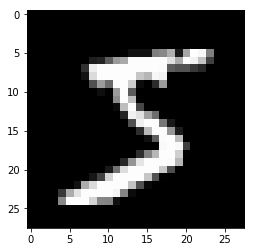

In [3]:
#Image sample
image, label = train_dataset[0]
plt.imshow(image)
print('Label:', label)

Label: 3


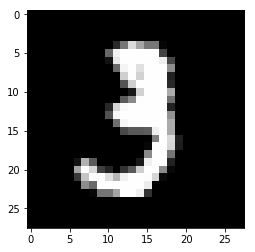

In [4]:
image, label = train_dataset[10]
plt.imshow(image)
print('Label:', label)

In [5]:
#Transform image to pytorch via ToTensor()
train_dataset = MNIST(root='MNIST_data', train=True,
                      transform=transforms.ToTensor())
test_dataset = MNIST(root='MNIST_data', train=False,
                      transform=transforms.ToTensor())

In [6]:
#Tensor sample size
img_tensor, label = train_dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [7]:
#Tensor sample values
print(img_tensor[:, 10:15, 10:15], torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]]) tensor(1.) tensor(0.)


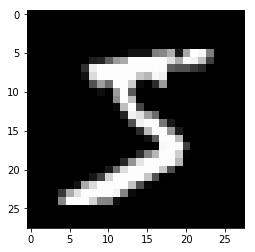

In [8]:
#Show(plot) tensor as image
plt.imshow(img_tensor[0], cmap='gray')

## Modeling

In [9]:
#Set parameters
input_size = 28 * 28
num_classes = 10
num_epochs = 5
batch_size = 100

In [10]:
#Dataset loader
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [11]:
class LogisticRegression(nn.Module):
    #Instantiate
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    #Pass input tensor into self.linear
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LogisticRegression(input_size, num_classes)

In [12]:
#Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [13]:
#Model Training
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28)) 
        labels = Variable(labels)
        
        #Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        if (i + 1) % 100 == 0:
            print('Epoch: [% d/% d], Step: [% d/% d], Loss: %.4f'
                  % (epoch + 1, num_epochs,
                     i + 1, len(train_dataset) // batch_size,
                     loss.data))

Epoch: [ 1/ 5], Step: [ 100/ 600], Loss: 2.2241
Epoch: [ 1/ 5], Step: [ 200/ 600], Loss: 2.0895
Epoch: [ 1/ 5], Step: [ 300/ 600], Loss: 2.0156
Epoch: [ 1/ 5], Step: [ 400/ 600], Loss: 1.9285
Epoch: [ 1/ 5], Step: [ 500/ 600], Loss: 1.9020
Epoch: [ 1/ 5], Step: [ 600/ 600], Loss: 1.8060
Epoch: [ 2/ 5], Step: [ 100/ 600], Loss: 1.6553
Epoch: [ 2/ 5], Step: [ 200/ 600], Loss: 1.6352
Epoch: [ 2/ 5], Step: [ 300/ 600], Loss: 1.6412
Epoch: [ 2/ 5], Step: [ 400/ 600], Loss: 1.6176
Epoch: [ 2/ 5], Step: [ 500/ 600], Loss: 1.5353
Epoch: [ 2/ 5], Step: [ 600/ 600], Loss: 1.4439
Epoch: [ 3/ 5], Step: [ 100/ 600], Loss: 1.4588
Epoch: [ 3/ 5], Step: [ 200/ 600], Loss: 1.3337
Epoch: [ 3/ 5], Step: [ 300/ 600], Loss: 1.3691
Epoch: [ 3/ 5], Step: [ 400/ 600], Loss: 1.3639
Epoch: [ 3/ 5], Step: [ 500/ 600], Loss: 1.1975
Epoch: [ 3/ 5], Step: [ 600/ 600], Loss: 1.2898
Epoch: [ 4/ 5], Step: [ 100/ 600], Loss: 1.2401
Epoch: [ 4/ 5], Step: [ 200/ 600], Loss: 1.2479
Epoch: [ 4/ 5], Step: [ 300/ 600], Loss:

## Model Testing

In [14]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy: % d %%' % (100 * correct / total))

..\aten\src\ATen\native\BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Accuracy:  82 %


# Q4-1)

optim.SGD는 매 epoch이 끝날 때마다 업데이트 되는 weight를 자동으로 계산해준다. 따라서 optim.SGD를 사용하지 않으려면 gradient descent 알고리즘을 짜서 직접 weight를 일일히 계산해주면 된다.

## Q4-2)

## 기존(SGD)

In [15]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
num_epochs = 1000

for epoch in range(num_epochs + 1):
    prediction = model(x_train)
    cost = torch.nn.functional.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{}, W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format
              (epoch, num_epochs, W, b, cost.item()))

Epoch    0/1000, W: 0.311, b: -0.145 Cost: 3.333758
Epoch  100/1000, W: 0.954, b: 0.104 Cost: 0.001555
Epoch  200/1000, W: 0.964, b: 0.082 Cost: 0.000961
Epoch  300/1000, W: 0.972, b: 0.064 Cost: 0.000594
Epoch  400/1000, W: 0.978, b: 0.050 Cost: 0.000367
Epoch  500/1000, W: 0.983, b: 0.040 Cost: 0.000227
Epoch  600/1000, W: 0.986, b: 0.031 Cost: 0.000140
Epoch  700/1000, W: 0.989, b: 0.025 Cost: 0.000087
Epoch  800/1000, W: 0.992, b: 0.019 Cost: 0.000053
Epoch  900/1000, W: 0.993, b: 0.015 Cost: 0.000033
Epoch 1000/1000, W: 0.995, b: 0.012 Cost: 0.000020


## Adam을 사용해보았다

In [16]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 1000

for epoch in range(num_epochs + 1):
    prediction = model(x_train)
    cost = torch.nn.functional.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format
              (epoch, num_epochs, W, b, cost.item()))

Epoch    0/1000 W: -0.159, b: 0.218 Cost: 5.448156
Epoch  100/1000 W: 0.522, b: 0.862 Cost: 0.164412
Epoch  200/1000 W: 0.626, b: 0.829 Cost: 0.100215
Epoch  300/1000 W: 0.677, b: 0.715 Cost: 0.074468
Epoch  400/1000 W: 0.731, b: 0.596 Cost: 0.051887
Epoch  500/1000 W: 0.782, b: 0.483 Cost: 0.034044
Epoch  600/1000 W: 0.828, b: 0.380 Cost: 0.021076
Epoch  700/1000 W: 0.869, b: 0.290 Cost: 0.012319
Epoch  800/1000 W: 0.903, b: 0.216 Cost: 0.006798
Epoch  900/1000 W: 0.930, b: 0.156 Cost: 0.003539
Epoch 1000/1000 W: 0.951, b: 0.109 Cost: 0.001737


## SGD에 momentum을 추가해 보았다

In [17]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
num_epochs = 1000

for epoch in range(num_epochs + 1):
    prediction = model(x_train)
    cost = torch.nn.functional.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format
              (epoch, num_epochs, W, b, cost.item()))

Epoch    0/1000 W: -0.484, b: -0.840 Cost: 20.204832
Epoch  100/1000 W: 1.012, b: -0.004 Cost: 0.000380
Epoch  200/1000 W: 1.000, b: -0.000 Cost: 0.000000
Epoch  300/1000 W: 1.000, b: -0.000 Cost: 0.000000
Epoch  400/1000 W: 1.000, b: -0.000 Cost: 0.000000
Epoch  500/1000 W: 1.000, b: -0.000 Cost: 0.000000
Epoch  600/1000 W: 1.000, b: -0.000 Cost: 0.000000
Epoch  700/1000 W: 1.000, b: -0.000 Cost: 0.000000
Epoch  800/1000 W: 1.000, b: -0.000 Cost: 0.000000
Epoch  900/1000 W: 1.000, b: -0.000 Cost: 0.000000
Epoch 1000/1000 W: 1.000, b: -0.000 Cost: 0.000000
